In [1]:
import matplotlib.pyplot as plt
import nest
neuron = nest.Create("iaf_psc_alpha")


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 17,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [3]:
neuron.get("I_e")
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [4]:
neuron.I_e

0.0

In [5]:
neuron.set({"I_e": 375})
neuron.I_e = 375.0
neuron.set(I_e=500.0)

In [6]:
multimeter = nest.Create("multimeter")
multimeter.set(record_from=["V_m"])

In [7]:
spikerecorder = nest.Create("spike_recorder")

In [8]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

In [9]:
nest.Simulate(100.0)


Apr 15 02:50:19 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Apr 15 02:50:19 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Apr 15 02:50:19 SimulationManager::run [Info]: 
    Simulation finished.


In [10]:
multimeter.get()

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'times': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
         14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
         27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
         40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
         53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
         66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
         79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91.,
         92., 93., 94., 95., 96., 97., 98., 99.]),
  'V_m': array([-68.09674836

In [11]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

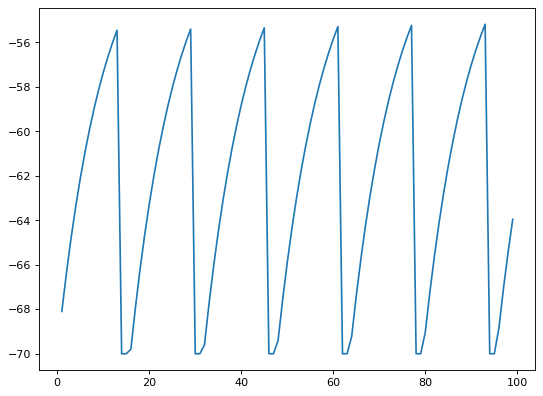

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, Vms)

In [13]:
spikerecorder.get()

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, 1, 1, 1]),
  'times': array([13.9, 29.8, 45.7, 61.6, 77.5, 93.4])},
 'frozen': False,
 'global_id': 3,
 'label': '',
 'local': True,
 'model': 'spike_recorder',
 'model_id': 56,
 'n_events': 6,
 'node_uses_wfr': False,
 'origin': 0.0,
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 2,
 'time_in_steps': False,
 'vp': 0}

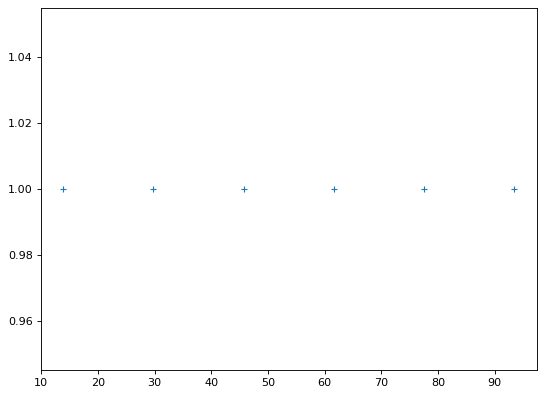

In [14]:
dSD = spikerecorder.get("events")
evs = dSD["senders"]
ts = dSD["times"]
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, evs, "+")
plt.show()

In [15]:
neuron_hh = nest.Create("hh_psc_alpha")
neuron_hh.get()

{'Act_m': 0.05293248525724958,
 'Act_n': 0.3176769140606974,
 'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 100.0,
 'Ca': 0.0,
 'E_K': -77.0,
 'E_L': -54.402,
 'E_Na': 50.0,
 'element_type': 'neuron',
 'frozen': False,
 'g_K': 3600.0,
 'g_L': 30.0,
 'g_Na': 12000.0,
 'global_id': 4,
 'I_e': 0.0,
 'Inact_h': 0.5961207535084603,
 'local': True,
 'model': 'hh_psc_alpha',
 'model_id': 72,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('Act_m', 'Act_n', 'I_syn_ex', 'I_syn_in', 'Inact_h', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 0.2,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -65.0,
 'vp': 0}


Apr 15 02:50:20 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Apr 15 02:50:20 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Apr 15 02:50:20 SimulationManager::run [Info]: 
    Simulation finished.


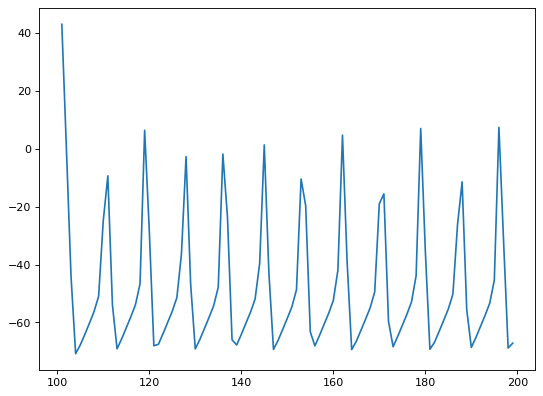

In [16]:
import matplotlib.pyplot as plt
neuron_hh.I_e = 5000
multimeter_hh = nest.Create("multimeter")
multimeter_hh.set(record_from=["V_m"])
nest.Connect(multimeter_hh, neuron_hh)
nest.Simulate(100.0)
dmm = multimeter_hh.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, Vms)

Esta parte corresponde al capítulo 2

In [17]:
import nest
neuron1 = nest.Create("iaf_psc_alpha")
neuron1.set(I_e=376.0)
neuron1.set(I_e=500.0)
neuron2 = nest.Create("iaf_psc_alpha")
multimeter_neuron_1 = nest.Create("multimeter")
multimeter_neuron_1.set(record_from=["V_m"])
multimeter_neuron_2 = nest.Create("multimeter")
multimeter_neuron_2.set(record_from=["V_m"])

In [18]:
nest.Connect(neuron1, neuron2, syn_spec = {"weight":1.0})
nest.Connect(multimeter_neuron_1, neuron1)
nest.Connect(multimeter_neuron_2, neuron2)

In [19]:
nest.Simulate(100.0)


Apr 15 02:50:20 NodeManager::prepare_nodes [Info]: 
    Preparing 9 nodes for simulation.

Apr 15 02:50:20 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 9
    Simulation time (ms): 100
    Number of OpenMP threads: 1
    Not using MPI

Apr 15 02:50:20 SimulationManager::run [Info]: 
    Simulation finished.


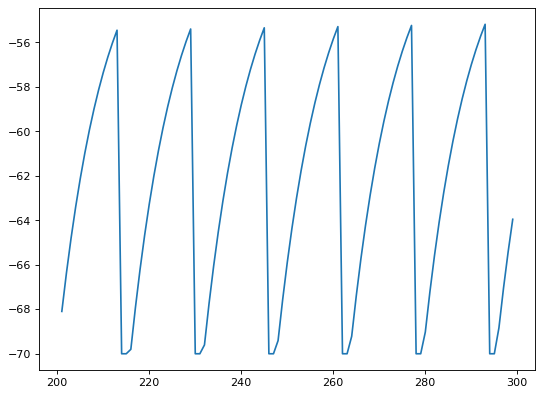

In [20]:
dmm = multimeter_neuron_1.get("events")
Vms = dmm["V_m"]
ts = dmm["times"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, Vms)

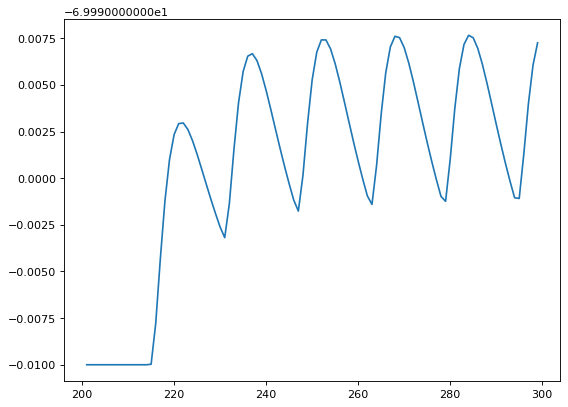

In [21]:
dmm = multimeter_neuron_2.get("events")
Vms = dmm["V_m"]
ts = dmm["times"]
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(ts, Vms)